In [1]:
import numpy as np
x_test = np.load('/home/jovyan/Wustl_iiot/x_test.npy')
x_train = np.load('/home/jovyan/Wustl_iiot/x_train.npy')
x_val = np.load('/home/jovyan/Wustl_iiot/x_val.npy')
y_test = np.load('/home/jovyan/Wustl_iiot/y_test.npy')
y_train = np.load('/home/jovyan/Wustl_iiot/y_train.npy')
y_val = np.load('/home/jovyan/Wustl_iiot/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
metrics = {
        "model" : '',
        "attack_model" : '',
        "epsilon" : '',
        "Accuracy": '',
        "Precision-micro": '',
        "Precision-macro": '',
        "Precision-weighted": '',
        "F1-micro": '',
        "F1-macro": '',
        "F1-weighted": '',
        "Recall_micro": '',
        "Recall_macro": '',
        "Recall_weighted": '',
        "FPR": '',
        "TPR": '',
        "FNR": '',
        "TNR": '',
        # "AUC": auc
    }
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/Wustl_iiot/transfer_attack/attackmodel.csv", mode='a', index=False)

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/Wustl_iiot/transfer_attack/attackmodel.csv", mode='a', index=False, header=False)

In [5]:
from joblib import dump, load
from sklearn import svm

best_svm = svm.SVC(C=10, kernel='poly', tol=0.01)
best_svm.fit(x_train, y_train)

dump(best_svm, "/home/jovyan/Wustl_iiot/pre_train/SVM.joblib")

model = best_svm

epsilon = 0.01
FPR: [4.18916598e-06 2.09467074e-05 0.00000000e+00 2.10877038e-05
 0.00000000e+00]
TPR: [0.88095238 0.90384615 1.         1.         0.99999548]
FNR: [1.19047619e-01 9.61538462e-02 0.00000000e+00 0.00000000e+00
 4.51773210e-06]
TNR: [0.99999581 0.99997905 1.         0.99997891 1.        ]
Accuracy: 0.9999539272804949
Precision(micro,macro,weighted): 0.9999539272804949,0.974901112196938,0.9999535497390988
F1(micro,macro,weighted: 0.9999539272804949,0.9654658404915167,0.9999533148718628
Recall(micro,macro,weighted: 0.9999539272804949,0.9569588034132872,0.9999539272804949
FPR: 9.24471542518973e-06
tpr: 0.9569588034132872
fnr: 0.04304119658671274
tnr: 0.9999907552845748


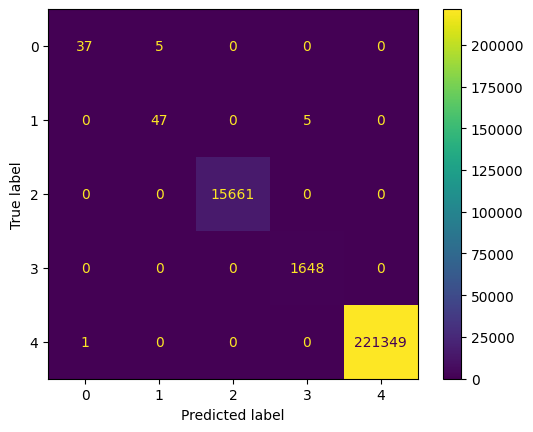

epsilon = 0.1
FPR: [8.37833196e-06 2.09467074e-05 0.00000000e+00 2.10877038e-05
 0.00000000e+00]
TPR: [0.88095238 0.90384615 0.99993615 1.         0.99999548]
FNR: [1.19047619e-01 9.61538462e-02 6.38528830e-05 0.00000000e+00
 4.51773210e-06]
TNR: [0.99999162 0.99997905 1.         0.99997891 1.        ]
Accuracy: 0.999949738851449
Precision(micro,macro,weighted): 0.999949738851449,0.9699078598352646,0.9999491578236215
F1(micro,macro,weighted: 0.999949738851449,0.9631755043820709,0.9999492116958049
Recall(micro,macro,weighted: 0.999949738851449,0.9569460328366958,0.999949738851449
FPR: 1.0082548620978782e-05
tpr: 0.9569460328366958
fnr: 0.04305396716330427
tnr: 0.9999899174513789


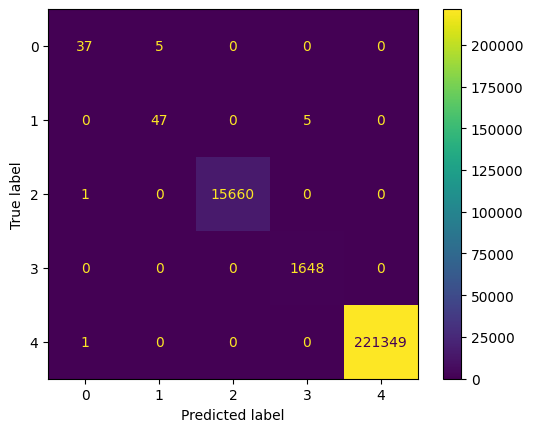

epsilon = 0.2
FPR: [6.70266557e-05 2.09467074e-05 0.00000000e+00 2.10877038e-05
 0.00000000e+00]
TPR: [0.88095238 0.90384615 0.99904221 1.         0.99999548]
FNR: [1.19047619e-01 9.61538462e-02 9.57793244e-04 0.00000000e+00
 4.51773210e-06]
TNR: [0.99993297 0.99997905 1.         0.99997891 1.        ]
Accuracy: 0.9998911008448061
Precision(micro,macro,weighted): 0.9998911008448061,0.9197869116011088,0.9999050729361889
F1(micro,macro,weighted: 0.9998911008448061,0.936159488960919,0.9998961938975846
Recall(micro,macro,weighted: 0.9998911008448061,0.9567672447644142,0.9998911008448061
FPR: 2.1812213362025486e-05
tpr: 0.9567672447644142
fnr: 0.043232755235585736
tnr: 0.9999781877866379


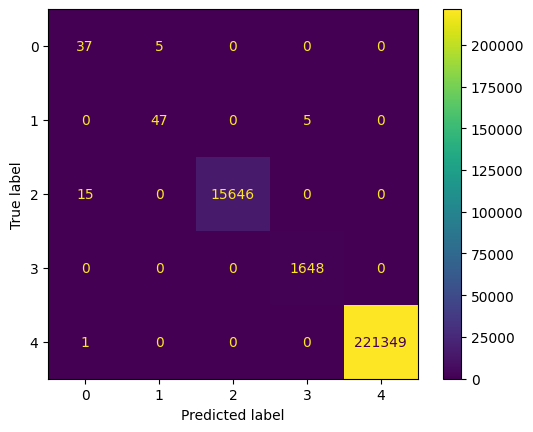

epsilon = 0.3
FPR: [2.76484955e-04 2.09467074e-05 0.00000000e+00 2.10877038e-05
 0.00000000e+00]
TPR: [0.88095238 0.88461538 0.99604112 1.         0.99998645]
FNR: [1.19047619e-01 1.15384615e-01 3.95887874e-03 0.00000000e+00
 1.35531963e-05]
TNR: [0.99972352 0.99997905 1.         0.99997891 1.        ]
Accuracy: 0.9996816793925103
Precision(micro,macro,weighted): 0.9996816793925103,0.8516318563793639,0.9998450468201112
F1(micro,macro,weighted: 0.9996816793925103,0.8800087753193534,0.9997437660550513
Recall(micro,macro,weighted: 0.9996816793925103,0.952319066725619,0.9996816793925103
FPR: 6.370387315147801e-05
tpr: 0.952319066725619
fnr: 0.04768093327438103
tnr: 0.9999362961268485


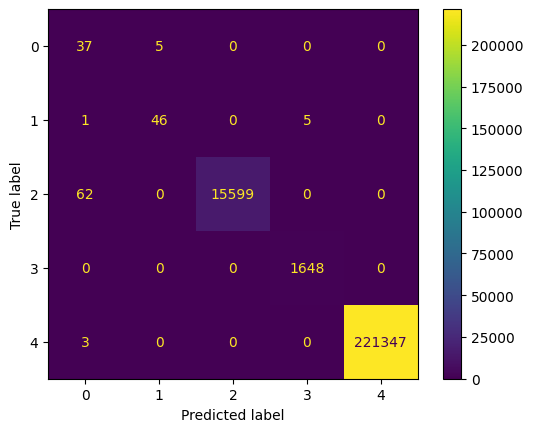

epsilon = 0.01
FPR: [4.18916598e-06 2.09467074e-05 0.00000000e+00 2.10877038e-05
 0.00000000e+00]
TPR: [0.88095238 0.90384615 1.         1.         0.99999548]
FNR: [1.19047619e-01 9.61538462e-02 0.00000000e+00 0.00000000e+00
 4.51773210e-06]
TNR: [0.99999581 0.99997905 1.         0.99997891 1.        ]
Accuracy: 0.9999539272804949
Precision(micro,macro,weighted): 0.9999539272804949,0.974901112196938,0.9999535497390988
F1(micro,macro,weighted: 0.9999539272804949,0.9654658404915167,0.9999533148718628
Recall(micro,macro,weighted: 0.9999539272804949,0.9569588034132872,0.9999539272804949
FPR: 9.24471542518973e-06
tpr: 0.9569588034132872
fnr: 0.04304119658671274
tnr: 0.9999907552845748


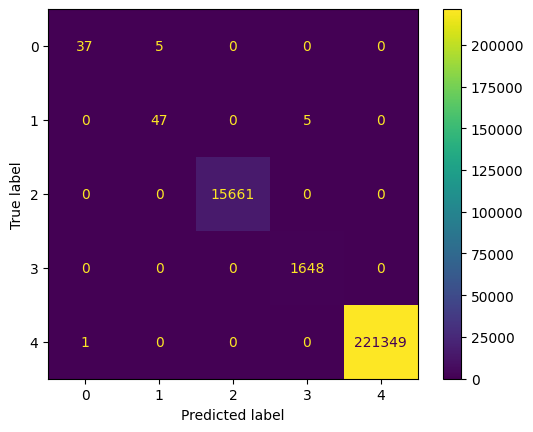

epsilon = 0.1
FPR: [8.37833196e-06 2.09467074e-05 0.00000000e+00 2.10877038e-05
 0.00000000e+00]
TPR: [0.88095238 0.90384615 0.99993615 1.         0.99999548]
FNR: [1.19047619e-01 9.61538462e-02 6.38528830e-05 0.00000000e+00
 4.51773210e-06]
TNR: [0.99999162 0.99997905 1.         0.99997891 1.        ]
Accuracy: 0.999949738851449
Precision(micro,macro,weighted): 0.999949738851449,0.9699078598352646,0.9999491578236215
F1(micro,macro,weighted: 0.999949738851449,0.9631755043820709,0.9999492116958049
Recall(micro,macro,weighted: 0.999949738851449,0.9569460328366958,0.999949738851449
FPR: 1.0082548620978782e-05
tpr: 0.9569460328366958
fnr: 0.04305396716330427
tnr: 0.9999899174513789


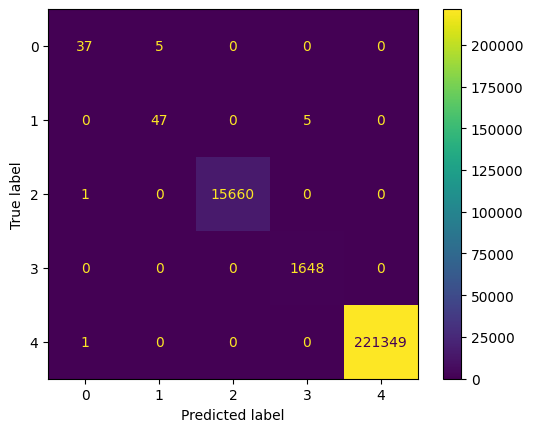

epsilon = 0.2
FPR: [9.21616515e-05 2.09467074e-05 0.00000000e+00 2.10877038e-05
 0.00000000e+00]
TPR: [0.88095238 0.90384615 0.99865909 1.         0.99999548]
FNR: [1.19047619e-01 9.61538462e-02 1.34091054e-03 0.00000000e+00
 4.51773210e-06]
TNR: [0.99990784 0.99997905 1.         0.99997891 1.        ]
Accuracy: 0.9998659702705306
Precision(micro,macro,weighted): 0.9998659702705306,0.9055879989052341,0.9998925839971342
F1(micro,macro,weighted: 0.9998659702705306,0.9268663129402823,0.9998754738927939
Recall(micro,macro,weighted: 0.9998659702705306,0.956690621304865,0.9998659702705306
FPR: 2.6839212536759786e-05
tpr: 0.956690621304865
fnr: 0.04330937869513493
tnr: 0.9999731607874633


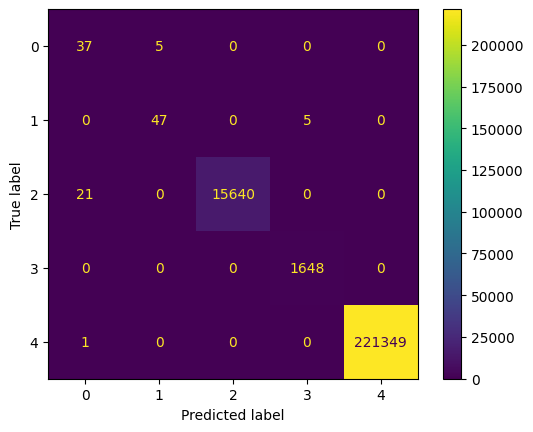

epsilon = 0.3
FPR: [3.01619950e-04 2.93253903e-05 0.00000000e+00 2.10877038e-05
 0.00000000e+00]
TPR: [0.88095238 0.90384615 0.99540259 1.         0.99999096]
FNR: [1.19047619e-01 9.61538462e-02 4.59740757e-03 0.00000000e+00
 9.03546420e-06]
TNR: [0.99969838 0.99997067 1.         0.99997891 1.        ]
Accuracy: 0.9996481719601429
Precision(micro,macro,weighted): 0.9996481719601429,0.841359021653399,0.9998346879997745
F1(micro,macro,weighted: 0.9996481719601429,0.8746070935451649,0.9997198645764354
Recall(micro,macro,weighted: 0.9996481719601429,0.9560384183522771,0.9996481719601429
FPR: 7.040660891717757e-05
tpr: 0.9560384183522771
fnr: 0.04396158164772282
tnr: 0.9999295933910828


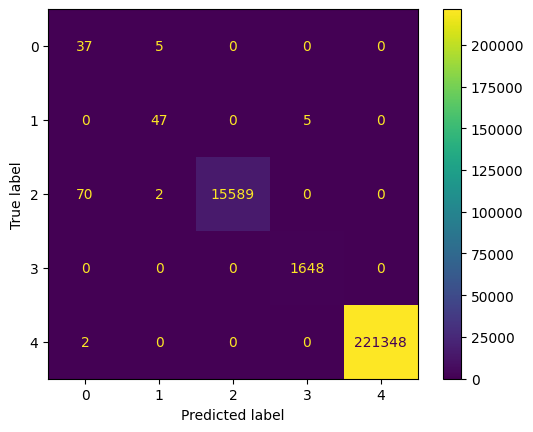

epsilon = 0.01
FPR: [4.18916598e-06 2.09467074e-05 0.00000000e+00 2.10877038e-05
 0.00000000e+00]
TPR: [0.88095238 0.90384615 1.         1.         0.99999548]
FNR: [1.19047619e-01 9.61538462e-02 0.00000000e+00 0.00000000e+00
 4.51773210e-06]
TNR: [0.99999581 0.99997905 1.         0.99997891 1.        ]
Accuracy: 0.9999539272804949
Precision(micro,macro,weighted): 0.9999539272804949,0.974901112196938,0.9999535497390988
F1(micro,macro,weighted: 0.9999539272804949,0.9654658404915167,0.9999533148718628
Recall(micro,macro,weighted: 0.9999539272804949,0.9569588034132872,0.9999539272804949
FPR: 9.24471542518973e-06
tpr: 0.9569588034132872
fnr: 0.04304119658671274
tnr: 0.9999907552845748


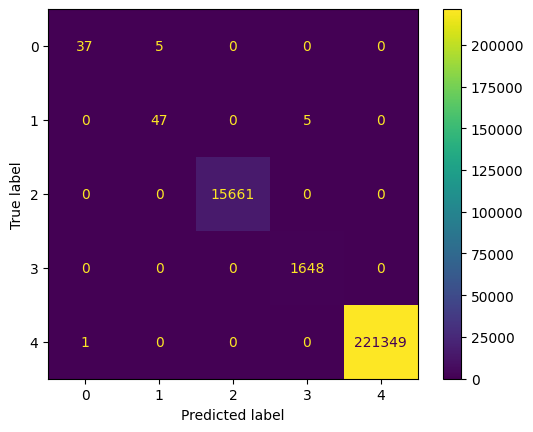

epsilon = 0.1
FPR: [8.37833196e-06 2.09467074e-05 0.00000000e+00 2.10877038e-05
 0.00000000e+00]
TPR: [0.88095238 0.90384615 0.99993615 1.         0.99999548]
FNR: [1.19047619e-01 9.61538462e-02 6.38528830e-05 0.00000000e+00
 4.51773210e-06]
TNR: [0.99999162 0.99997905 1.         0.99997891 1.        ]
Accuracy: 0.999949738851449
Precision(micro,macro,weighted): 0.999949738851449,0.9699078598352646,0.9999491578236215
F1(micro,macro,weighted: 0.999949738851449,0.9631755043820709,0.9999492116958049
Recall(micro,macro,weighted: 0.999949738851449,0.9569460328366958,0.999949738851449
FPR: 1.0082548620978782e-05
tpr: 0.9569460328366958
fnr: 0.04305396716330427
tnr: 0.9999899174513789


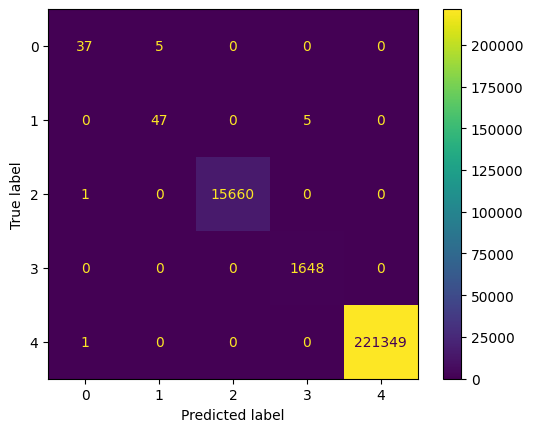

epsilon = 0.2
FPR: [9.21616515e-05 2.09467074e-05 0.00000000e+00 2.10877038e-05
 0.00000000e+00]
TPR: [0.88095238 0.90384615 0.99865909 1.         0.99999548]
FNR: [1.19047619e-01 9.61538462e-02 1.34091054e-03 0.00000000e+00
 4.51773210e-06]
TNR: [0.99990784 0.99997905 1.         0.99997891 1.        ]
Accuracy: 0.9998659702705306
Precision(micro,macro,weighted): 0.9998659702705306,0.9055879989052341,0.9998925839971342
F1(micro,macro,weighted: 0.9998659702705306,0.9268663129402823,0.9998754738927939
Recall(micro,macro,weighted: 0.9998659702705306,0.956690621304865,0.9998659702705306
FPR: 2.6839212536759786e-05
tpr: 0.956690621304865
fnr: 0.04330937869513493
tnr: 0.9999731607874633


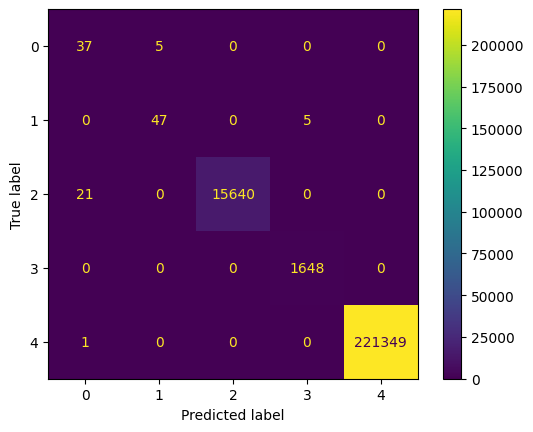

epsilon = 0.3
FPR: [3.01619950e-04 2.93253903e-05 0.00000000e+00 2.10877038e-05
 0.00000000e+00]
TPR: [0.88095238 0.90384615 0.99540259 1.         0.99999096]
FNR: [1.19047619e-01 9.61538462e-02 4.59740757e-03 0.00000000e+00
 9.03546420e-06]
TNR: [0.99969838 0.99997067 1.         0.99997891 1.        ]
Accuracy: 0.9996481719601429
Precision(micro,macro,weighted): 0.9996481719601429,0.841359021653399,0.9998346879997745
F1(micro,macro,weighted: 0.9996481719601429,0.8746070935451649,0.9997198645764354
Recall(micro,macro,weighted: 0.9996481719601429,0.9560384183522771,0.9996481719601429
FPR: 7.040660891717757e-05
tpr: 0.9560384183522771
fnr: 0.04396158164772282
tnr: 0.9999295933910828


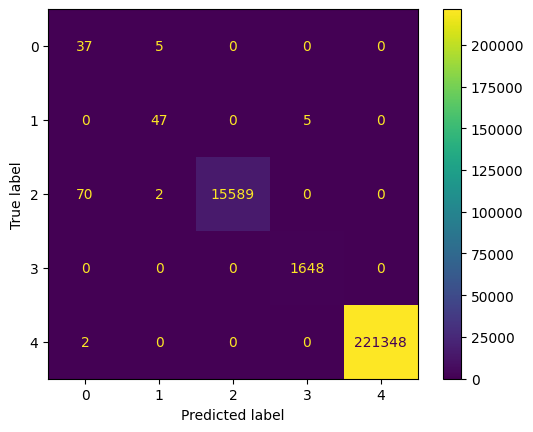

epsilon = 1e-07
FPR: [0.03323265 0.00629658 0.01062342 0.0012273  0.63695914]
TPR: [2.14285714e-01 0.00000000e+00 5.74675947e-04 1.63834951e-02
 9.73688728e-01]
FNR: [0.78571429 1.         0.99942532 0.9836165  0.02631127]
TNR: [0.96676735 0.99370342 0.98937658 0.9987727  0.36304086]
Accuracy: 0.9029038378575348
Precision(micro,macro,weighted): 0.9029038378575348,0.20818111065451173,0.8825923385184566
F1(micro,macro,weighted: 0.9029038378575348,0.19859452802426883,0.8923690126694107
Recall(micro,macro,weighted: 0.9029038378575348,0.2409865227272757,0.9029038378575348
FPR: 0.13766782064394684
tpr: 0.2409865227272757
fnr: 0.7590134772727243
tnr: 0.8623321793560532


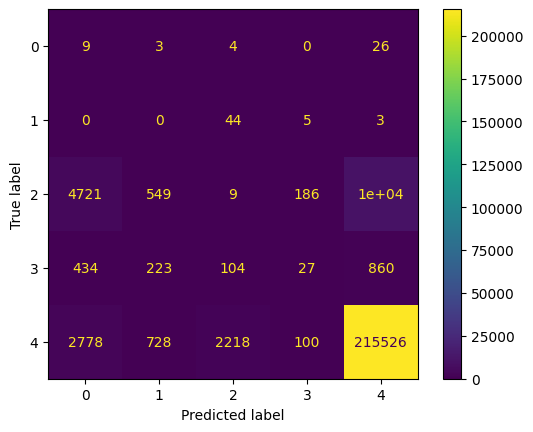

epsilon = 1e-06
FPR: [0.03323265 0.00629658 0.01062342 0.0012273  0.63695914]
TPR: [2.14285714e-01 0.00000000e+00 5.74675947e-04 1.63834951e-02
 9.73688728e-01]
FNR: [0.78571429 1.         0.99942532 0.9836165  0.02631127]
TNR: [0.96676735 0.99370342 0.98937658 0.9987727  0.36304086]
Accuracy: 0.9029038378575348
Precision(micro,macro,weighted): 0.9029038378575348,0.20818111065451173,0.8825923385184566
F1(micro,macro,weighted: 0.9029038378575348,0.19859452802426883,0.8923690126694107
Recall(micro,macro,weighted: 0.9029038378575348,0.2409865227272757,0.9029038378575348
FPR: 0.13766782064394684
tpr: 0.2409865227272757
fnr: 0.7590134772727243
tnr: 0.8623321793560532


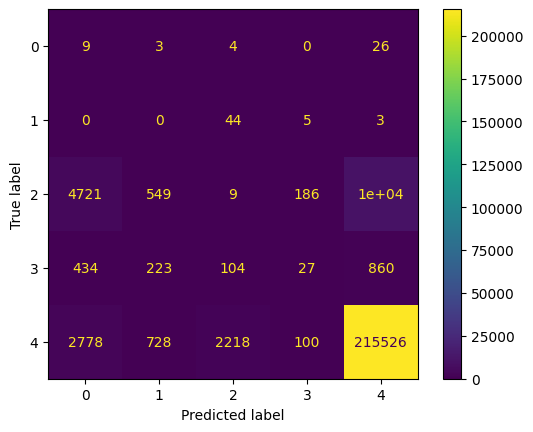

epsilon = 1e-05
FPR: [0.03323265 0.00629658 0.01062342 0.0012273  0.63695914]
TPR: [2.14285714e-01 0.00000000e+00 5.74675947e-04 1.63834951e-02
 9.73688728e-01]
FNR: [0.78571429 1.         0.99942532 0.9836165  0.02631127]
TNR: [0.96676735 0.99370342 0.98937658 0.9987727  0.36304086]
Accuracy: 0.9029038378575348
Precision(micro,macro,weighted): 0.9029038378575348,0.20818111065451173,0.8825923385184566
F1(micro,macro,weighted: 0.9029038378575348,0.19859452802426883,0.8923690126694107
Recall(micro,macro,weighted: 0.9029038378575348,0.2409865227272757,0.9029038378575348
FPR: 0.13766782064394684
tpr: 0.2409865227272757
fnr: 0.7590134772727243
tnr: 0.8623321793560532


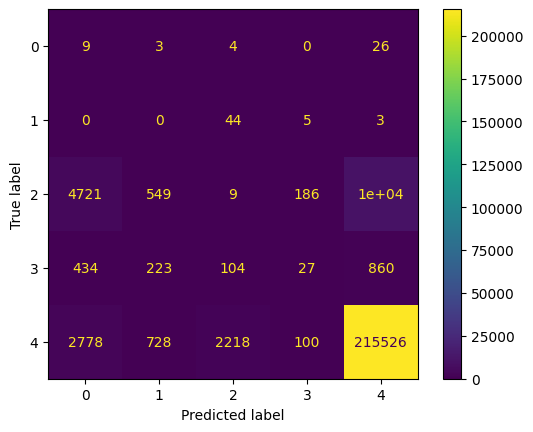

epsilon = 0.0001
FPR: [0.03322846 0.00630077 0.01062342 0.0012273  0.63695914]
TPR: [2.14285714e-01 0.00000000e+00 5.74675947e-04 1.63834951e-02
 9.73688728e-01]
FNR: [0.78571429 1.         0.99942532 0.9836165  0.02631127]
TNR: [0.96677154 0.99369923 0.98937658 0.9987727  0.36304086]
Accuracy: 0.9029038378575348
Precision(micro,macro,weighted): 0.9029038378575348,0.2081811391953961,0.8825923385435603
F1(micro,macro,weighted: 0.9029038378575348,0.1985945845070201,0.8923690127190913
Recall(micro,macro,weighted: 0.9029038378575348,0.2409865227272757,0.9029038378575348
FPR: 0.13766782067904654
tpr: 0.2409865227272757
fnr: 0.7590134772727243
tnr: 0.8623321793209534


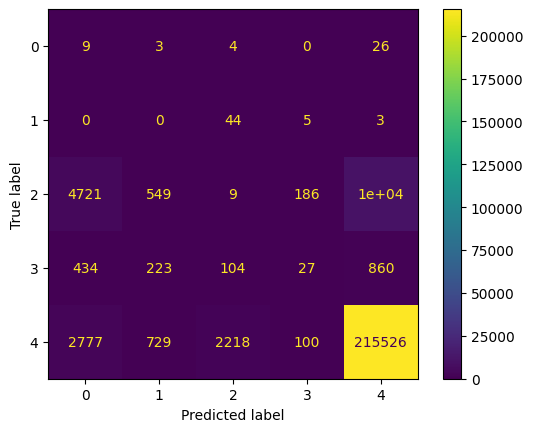

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Wustl_iiot/transfer_attack/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "FGSM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Wustl_iiot/transfer_attack/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "BIM", epsilon)

epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Wustl_iiot/transfer_attack/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "PGD", epsilon)

DF_eps = [1e-07, 1e-06, 1e-05, 1e-04]
for epsilon in DF_eps:
    filename = f'/home/jovyan/Wustl_iiot/transfer_attack/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "SVM", "DF", epsilon)